# Nueral Network from scratch
So this is just a notebook I created when I was following the [Neural Networks from Scratch](https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3) series by [sentdex](https://www.youtube.com/@sentdex) on youtube. I recommend that you watch their videos alongside this to get a better graps of the content. Or alternatively check out their [website](https://nnfs.io/) for animations to help gauge the content becuase it's that good. 

## Neural Network Explanation
A neural network consists of layers of interconnected nodes (neurons):
- **Input Layer**: Receives input features.
- **Hidden Layer**: Processes inputs with weighted connections.
- **Output Layer**: Produces the final output.
<img src="media/ml_from_scratch/NNDiagram.jpg" alt="NNDiagram" style="width: 300px;"/>


## How it works
This picture illustrates the computation inside a neuron:
- **Inputs (x1, x2, ..., xn)**: The features provided to the neuron.
- **Weights (w1, w2, ..., wn)**: The strength of the connection between inputs and the neuron.
- **Bias (b)**: An additional parameter to adjust the output.
- **Summation (Σ)**: Adds the weighted inputs and the bias.
- **Activation Function (f)**: Applies a function to the sum to produce the neuron's output (y).
<img src="media/ml_from_scratch/NNEquation.jpg" alt="NNEquation" style="width: 300px;"/>

If that was confusing gibberish to you then don't worry 😅. This notebook will run through the entrie process of building a basic nueral network from scratch to help you understand how NN work on a fundamental level.

## The basics
The diagram shows a basic building block of neural networks: the artificial neuron. It works like this:

- **Input (x)**: The data you want the neuron to process.
- **Weight (w)**: A number that determines how important the input is.
- **Output (y)**: The result the neuron calculates.
<img src="media/ml_from_scratch/Input_Output.png" alt="Picture1" style="width: 250px;"/>

##### Mathematically
$$ \Large y = w \cdot x $$

- The input (x) is multiplied by the weight (w).
- This weighted input is then processed within the neuron (often with a bias and activation function, not shown here).
- The final result is the output (y).

In [1]:
### Code for implementation above with random values
inputs = [1]
weights = [7]

output = inputs[0]*weights[0]
print(output)

7


## The Bias
Bias in neural networks adjusts how neurons respond to inputs and ensures neurons can output values beyond zero, even when inputs are zero, enhancing their ability to learn diverse patterns.
<img src="media/ml_from_scratch/Input_Output_Bias.png" alt="Picture4" style="width: 250px;"/>

#### Comparison to Line Equation
Like adjusting b in y = mx + b:

<img src="media/ml_from_scratch/linear_graph.png" alt="Picture5" style="width: 250px;"/>

- **Positive Bias**: Increases neuron activation likelihood.
- **Negative Bias**: Decreases neuron activation likelihood.
- **Zero Bias**: Neurons start with a neutral output based solely on inputs.

In [2]:
### Code for implementation above with random values
inputs = [1]
weights = [7]
bias = [0]

output = inputs[0]*weights[0] + bias[0]
print(output)

7


## Adding nuerons/nodes in layers
Each input (e.g., x1, x2, x3) represents a specific aspect of the data.

Every input connects to each output (e.g., y1, y2) via a line that embodies a weight (e.g., w) and a bias (e.g., b). This weight quantifies the input's influence on the specific output.

<img src="media/ml_from_scratch/Layers.png" alt="Picture3" style="width: 250px;"/>

##### Mathematically
Each output (e.g., y1) is determined by:
- Multiplying each input by its corresponding weight: 
  $$ w_1 \cdot x_1, w_2 \cdot x_2, w_3 \cdot x_3 $$  
- Summing all these weighted inputs together: $$ w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 $$
- Adding a bias term \( b \) to the sum: $$ y_1 = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b $$

In [3]:
# Input Layer (3 nodes)
inputs = [1.0, 2.0, 3.0]

# Weight Matrix (2x3 - each row corresponds to the weights for one output)
weights = [[0.5, 0.3, 0.7], [0.2, 0.8, 1.5]]  

# Biases (for each output)
biases = [0.03, 0.06]

# Calculations - Multiply input by corresponding weight, sum, and add bias
output = [
    inputs[0]*weights[0][0] + inputs[1]*weights[0][1] + inputs[2]*weights[0][2] + biases[0],
    inputs[0]*weights[1][0] + inputs[1]*weights[1][1] + inputs[2]*weights[1][2] + biases[1]
] 

print(output)

[3.2299999999999995, 6.359999999999999]


## The Dot Product
The dot product operation in neural networks simplifies the calculation of outputs by performing two key tasks:
- **Element-wise Multiplication**: Computes the product of corresponding elements.
- **Summation**: Adds these products to produce a scalar value.

#### Mathematically
- **Inputs:** represent data features $$ \mathbf{x} = [x_1, x_2, x_3] $$ 
- **Weights:** determine how much each input influences the output. $$ \mathbf{w} = [w_1, w_2, w_3] $$ 
- **Bias:** adds constant b to the output calculation 
- **Output:** for specific output y_1
$$
\mathbf{y_1} = \mathbf{w} \cdot \mathbf{x} + b = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} + b = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b
$$


In [4]:
import numpy as np

inputs = [1.0, 2.0, 3.0]
weights = [[0.5, 0.3, 0.7], [0.2, 0.8, 1.5]]  
biases = [0.03, 0.06]

output = np.dot(weights, inputs) + biases
print(output)

[3.23 6.36]


## Batches

In batch processing, benefits include improved computation efficiency, enhanced generalization, and stability promotion. Transitioning from a vector to a matrix:

$$
\text{Vector Input} = [x_1, x_2, x_3]
$$

$$
\text{Batch Inputs} = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23}
\end{bmatrix}
$$

### Matrix Transpose

When transitioning from vector output to matrix input, adjust by transposing the weights matrix W:

$$
\mathbf{W} = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{bmatrix} \quad \Rightarrow \quad \mathbf{W}^T = \begin{bmatrix} w_{11} & w_{21} \\ w_{12} & w_{22} \\ w_{13} & w_{23} \end{bmatrix}
$$

This ensures correct multiplication with the batch input matrix X:

$$
\mathbf{Y} = \mathbf{X} \cdot \mathbf{W}^T + \mathbf{b} = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23}
\end{bmatrix} \cdot \begin{bmatrix} w_{11} & w_{21} \\ w_{12} & w_{22} \\ w_{13} & w_{23} \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
$$

#### Mathematically

$$
y_{ij} = x_{i1} \cdot w_{1j} + x_{i2} \cdot w_{2j} + x_{i3} \cdot w_{3j} \quad \text{for } i = 1, 2 \text{ and } j = 1, 2
$$

$$
\mathbf{Y} = \begin{bmatrix}
x_{11} \cdot w_{11} + x_{12} \cdot w_{21} + b_1 & x_{11} \cdot w_{12} + x_{12} \cdot w_{22} + b_2 \\
x_{21} \cdot w_{11} + x_{22} \cdot w_{21} + b_1 & x_{21} \cdot w_{12} + x_{22} \cdot w_{22} + b_2
\end{bmatrix}
$$

$$
\mathbf{Y} = \begin{bmatrix}
\sum_{k=1}^{3} x_{1k} \cdot w_{k1} + b_1 & \sum_{k=1}^{3} x_{1k} \cdot w_{k2} + b_2 \\
\sum_{k=1}^{3} x_{2k} \cdot w_{k1} + b_1 & \sum_{k=1}^{3} x_{2k} \cdot w_{k2} + b_2
\end{bmatrix}
$$

In [5]:
inputs = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
weights = [[0.5, 0.3, 0.7], [0.2, 0.8, 1.5]] 
transposed_weights = np.array(weights).T
biases = [0.03, 0.06]

output = np.dot(inputs, transposed_weights) + biases
print(output)

[[ 3.23  6.36]
 [ 7.73 13.86]]


## Layers

- **Input Layer:** Receives input data.
- **Hidden Layer:** Processes input through weighted sums and activation functions.
- **Output Layer:** Produces the final output.

<img src="media/ml_from_scratch/Input_Hidden_Output_Layer.png" alt="Picture8" style="width: 250px;"/>

#### Mathematically

$$
y_{ij} = \sum_{k=1}^{n} x_{ik} \cdot w_{kj} + b_j \quad \text{for } i = 1, 2, \ldots, p \text{ and } j = 1, 2, \ldots, m
$$

**Where:**
- $ y_{ij} $ represents the activation of the $ i $-th neuron in the output layer for the $ j $-th sample.
- $ x_{ik} $ denotes the activation of the $ k $-th neuron in the input layer for the $ i $-th sample.
- $ w_{kj} $ signifies the weight connecting the $ k $-th neuron in the input layer to the $ j $-th neuron in the output layer.
- $ b_j $ is the bias term associated with the $ j $-th neuron in the output layer.


In [6]:
inputs = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

weights_1 = [[0.5, 0.3, 0.7], [0.2, 0.8, 1.5]]
transposed_weights_1 = np.array(weights_1).T
biases_1 = [0.03, 0.06]

weights_2 = [[0.5, 0.3], [0.2, 0.8]]
transposed_weights_2 = np.array(weights_2).T
biases_2 = [0.03, 0.06]

# Layer 1 computation
layer_1_output = np.dot(inputs, transposed_weights_1) + biases_1
print("Layer 1 Output:")
print(layer_1_output)

# Layer 2 computation
layer_2_output = np.dot(layer_1_output, transposed_weights_2) + biases_2
print("\nLayer 2 Output:")
print(layer_2_output)

Layer 1 Output:
[[ 3.23  6.36]
 [ 7.73 13.86]]

Layer 2 Output:
[[ 3.553  5.794]
 [ 8.053 12.694]]


## Coding a Layer

- **Normalization:** Adjust input data to a small range, e.g., [-1.5, 1.5], for stable training where $ \mu $ is the mean and $ \sigma $ is the standard deviation.

  $$ X_{\text{normalized}} = \frac{X - \mu}{\sigma} $$


- **Gaussian Distribution:** Initialize weights $ W $ with a Gaussian distribution around zero, 

$$ N(0, \sigma^2) $$

- **Biases:** Initialize biases (randomly) slightly positive to prevent neuron inactivity.

  $$ b \sim N(0, 0.01) $$


In [7]:
np.random.seed(0)
    
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer:
    def __init__(self, n_inputs, n_nuerons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_nuerons)
        self.biases = np.zeros((1, n_nuerons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
layer_1 = Layer(4,5)
layer_2 = Layer(5,2)

layer_1.forward(X)
print("Layer 1 Output:")
print(layer_1.output)
layer_2.forward(layer_1.output)
print("Layer 2 Output:")
print(layer_2.output)

Layer 1 Output:
[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
Layer 2 Output:
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Activation Functions

#### Linear Function
$$ f(x) = ax + b $$
- Fits linear relationships.
- Limited for complex patterns.

In [8]:
class Activation_Linear:
    def forward(self, inputs):
        self.output = inputs

# Initialize Layer and Activation_Linear instances
layer_1 = Layer(4, 5)
activation_linear = Activation_Linear()

# Apply Linear activation to Layer 1 output
layer_1.forward(X)
activation_linear.forward(layer_1.output)
print("\nActivation output for Layer 1 (Linear Activation):")
print(activation_linear.output)


Activation output for Layer 1 (Linear Activation):
[[-0.37731993 -0.45532983 -0.16581107 -0.09378685 -0.30133249]
 [ 0.12640441  0.58222057  0.74975787 -1.10767981 -0.21231664]
 [-0.29200443 -0.09292818 -0.16745797  0.96540894 -0.18060092]]


#### Step Function
$$
f(x) = 
\begin{cases} 
  0 & \text{if } x < 0 \\
  1 & \text{if } x \geq 0 
\end{cases}
$$
- Categorizes data into two classes based on a threshold.
- Simple but lacks smoothness.

In [9]:
class Activation_Step:
    def forward(self, inputs):
        self.output = np.where(inputs >= 0, 1, 0)

# Initialize Layer and Activation_Step instances
layer_1 = Layer(4, 5)
activation_step = Activation_Step()

# Apply Step activation to Layer 1 output
layer_1.forward(X)
activation_step .forward(layer_1.output)
print("\nActivation output for Layer 1 (Step  Activation):")
print(activation_step.output)


Activation output for Layer 1 (Step  Activation):
[[0 0 0 0 0]
 [1 0 1 0 0]
 [1 0 0 0 0]]


#### Sigmoid Function
$$ f(x) = \frac{1}{1 + e^{-x}} $$
- Smoothly transitions between 0 and 1.
- Suitable for probabilities and moderate non-linear patterns.

In [10]:
class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

# Initialize Layer and Activation_Sigmoid instances
layer_1 = Layer(4, 5)
activation_sigmoid = Activation_Sigmoid()

# Apply Sigmoid activation to Layer 1 output
layer_1.forward(X)
activation_sigmoid.forward(layer_1.output)
print("\nActivation output for Layer 1 (Sigmoid Activation):")
print(activation_sigmoid.output)


Activation output for Layer 1 (Sigmoid Activation):
[[0.51508901 0.59957191 0.52320523 0.28610963 0.68169142]
 [0.57422393 0.43439819 0.46403823 0.38621095 0.54255086]
 [0.30355355 0.48712977 0.46029952 0.4206281  0.58942297]]


#### ReLU Function (Rectified Linear Unit)
$$
f(x) = 
\begin{cases} 
  0 & \text{if } x < 0 \\
  x & \text{if } x \geq 0 
\end{cases}
$$
- Learns complex patterns efficiently.
- Addresses gradient issues in deep networks.

In [11]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Initialize Layer and Activation_ReLU instances
layer_1 = Layer(4, 5)
activation_ReLU = Activation_ReLU()

# Apply ReLU activation to Layer 1 output
layer_1.forward(X)
activation_ReLU.forward(layer_1.output)
print("\nActivation output for Layer 1 (after ReLU):")
print(activation_ReLU.output)


Activation output for Layer 1 (after ReLU):
[[1.15184744 0.         0.         0.89460084 0.13422619]
 [0.47306036 0.30179113 0.91214778 0.54643259 0.68568326]
 [0.71720133 0.         0.09148012 0.05383596 0.        ]]


#### Softmax Function

Converts raw scores (logits) into probabilities for multi-class classification tasks. For an input vector $\mathbf{x} = (x_1, x_2, \ldots, x_L)$, softmax computes probabilities $\mathbf{f(x)} = (f(x)_1, f(x)_2, \ldots, f(x)_L)$:
  
$$ f(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{L} e^{x_j}} $$

##### Exponentiation

$ e^{x_i} $ transforms each raw score $ x_i $ into a positive value:

$$ e^{x_i} = \exp(x_i) $$

##### Normalization

$\sum_{j=1}^{L} e^{x_j}$ in the denominator ensures the sum of probabilities equals 1, making $\mathbf{f(x)}$ a valid probability distribution:

$$ \sum_{j=1}^{L} e^{x_j} = e^{x_1} + e^{x_2} + \ldots + e^{x_L} $$


In [12]:
import math

# Input logits
layer_output_1 = [4.8, 1.21, 2.385]

# Exponentiation step: calculate e^x for each logit
exp_values = [math.exp(output) for output in layer_output_1]
print(f"Exponentiated values: \n{exp_values}")

# Normalization step: calculate the sum of the exponentiated values
norm_base = sum(exp_values)

# Normalize the exponentiated values to get the probabilities
norm_values = [value / norm_base for value in exp_values]
print(f"\nNormalized values (probabilities): \n{norm_values}")

# Verify that the sum of probabilities is 1
print(f"\nSum of probabilities: \n{sum(norm_values)}")

Exponentiated values: 
[121.51041751873485, 3.3534846525490236, 10.859062664920515]

Normalized values (probabilities): 
[0.8952826639572619, 0.02470830678209937, 0.0800090292606387]

Sum of probabilities: 
0.9999999999999999


### Overflow Prevention in Softmax

Softmax exponentiates potentially large numbers, which can lead to numerical instability and overflow errors. To prevent this, adjust each logit by subtracting $ \max(\mathbf{x}) $:

$$ f(x)_i = \frac{e^{x_i - \max(\mathbf{x})}}{\sum_{j=1}^{C} e^{x_j - \max(\mathbf{x})}} $$

- **Adjustment**: $ \max(\mathbf{x}) $ is the maximum value in $ \mathbf{x} $.
- Ensures exponentiated values remain manageable, preserving relative probabilities.

In [13]:
class Activation_Softmax:
    def forward(self, inputs):
        # Note that the overflow prevention has been added
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

input_layer = Layer(4, 3)
activation_ReLU = Activation_ReLU()
output_layer = Layer(3,2)
activation_softmax = Activation_Softmax()

# Forward pass through the first layer and ReLU activation
input_layer.forward(X)
activation_ReLU.forward(input_layer.output)
print(f"Activation output for Layer 1 (Step  ReLu): \n{activation_ReLU.output}")

# Forward pass through the second layer and softmax activation
output_layer.forward(activation_ReLU.output)
activation_softmax.forward(output_layer.output)
print(f"\nActivation output for Layer 1 (Step  Softmax): \n{activation_softmax.output}")

Activation output for Layer 1 (Step  ReLu): 
[[1.08349614 0.08460715 0.        ]
 [1.41826041 0.13799336 0.        ]
 [0.47440031 0.         0.63644534]]

Activation output for Layer 1 (Step  Softmax): 
[[0.47103    0.52897   ]
 [0.46174048 0.53825952]
 [0.45161042 0.54838958]]


## Datasets
Now lets get into the juicy stuff like the loss function and backpropagation. But before that, let's load a dataset that we will be using. This dataset is from the Stanford [CS231 course](https://cs231n.github.io/neural-networks-case-study).

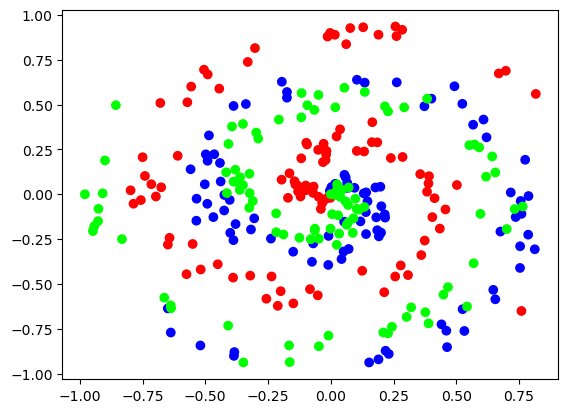

In [14]:
from matplotlib import pyplot as plt

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show() 

## Calculating Loss: Categorical Cross-Entropy

In a classification task with classes cat, dog, and bird, post-softmax predicted probabilities for a sample are $[0.7, 0.1, 0.2]$ (interpreted as 70% cat, 10% dog, 20% bird), represented via one-hot encoding as follows:

- One-hot Encoding: $[1, 0, 0]$
- Predicted probabilities: $[0.7, 0.1, 0.2]$

#### Categorical Cross-Entropy

We calculate the loss by summing the negative logarithms of the predicted probabilities, weighted by the true labels:

$$ L_i = -(1 \cdot \log(0.7) + 0 \cdot \log(0.1) + 0 \cdot \log(0.2)) $$

Due to one-hot encoding, only the probability of the true class contributes to the cross-entropy loss because the other terms are multiplied by 0:

$$ L_i = -\log(0.7) $$

In [34]:
import math

# Given softmax output probabilities and target class
softmax_output = [0.7, 0.1, 0.2]
target_class = 0 

# One-hot encoded target output corresponding to class
target_output = [1, 0, 0]

# Categorical cross-entropy: sum of negative logarithms of softmax predictions
loss = -(target_output[0] * math.log(softmax_output[0]) + 
         target_output[1] * math.log(softmax_output[1]) +
         target_output[2] * math.log(softmax_output[2]))

# Simplified loss where only the probability of the true class contributes
simplified_loss = -math.log(softmax_output[target_class])

print("Standard Loss Calculation:", loss)
print("\nSimplified Loss Calcualtion:", simplified_loss)

Standard Loss Calculation: 0.35667494393873245

Simplified Loss Calcualtion: 0.35667494393873245


## Calculating Loss: Batches
We can express all of this mathematically. Remember we are working in batches, so below will show an implementation of such.

#### Mathematically
The formula measures how well a model's predictions match the actual labels for a specific sample $ i $.

$$ L_i = -\sum_{j} y_{(i,j)} \log(\hat{y}_{(i,j)}) $$

where:
- $ L_i $: This is the loss score for the sample $ i $, indicating how accurate or inaccurate the model's prediction is.
  
- $ \sum_{j} $: This sums up the contributions from all possible classes $ j $, ensuring all predictions are considered.
  
- $ y_{(i,j)} $: Represents the true label for sample $ i $ and class $ j $. It's 1 if the sample belongs to class $ j $, and 0 otherwise.
  
- $ \log(\hat{y}_{(i,j)}) $: Measures the difference between the predicted probability $ \hat{y}_{(i,j)} $ and the actual label $ y_{(i,j)} $. It helps quantify how much the model needs to adjust its predictions.

For the true class $k$, this simplifies to:
$$ L_i = -\log(\hat{y}_{i,k}) $$

where $\hat{y}_{i,k}$ is the predicted probability for the true class $k$ for the $i$-th sample.

In [36]:
# Given softmax outputs for three samples across three classes
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

# Corresponding class targets for each sample
class_targets = [0, 1, 1]

batch_outputs = softmax_outputs[[0, 1, 2], class_targets]
neg_log_hardcoded = [-math.log(output) for output in batch_outputs]

# Simplified using numpy indexing
batch_outputs = softmax_outputs[range(len(softmax_outputs)), class_targets]
neg_log_numpy = -np.log(batch_outputs)

# Calculate average loss across the batch
average_loss = np.mean(neg_log_numpy)

print("Average Loss:", average_loss)

Average Loss: 0.38506088005216804


## Calculating Loss: Dealing with Zeros

In categorical cross-entropy, during average loss calculations, our softmax output may approach zero, especially when the true class in one-hot encoding is zero. This scenario can lead to an infinite loss, which is impractical for training models. So, how do we handle this edge case?

### Example:

Consider a scenario where the softmax output for a sample is `[0.0, 0.9, 0.1]` and the true class (one-hot encoded) is `[1, 0, 0]`. Here, the predicted probability for the true class is exactly zero, $\hat{y}_{i,k} = 0.0$.

### Mathematical Breakdown: Infinite Loss

In this example, if $\hat{y}_{i,k} = 0.0$:

$$ L_i = -\log(0.0) $$

Taking the logarithm directly results in an infinite value:

$$ L_i = -\log(0.0) = \infty $$

This signifies an infinite loss due to the model's absolute certainty (probability of zero) in an incorrect prediction.

### Mathematical Breakdown: Clipping Solution

To prevent such numerical instability, we introduce a small clipping threshold $\epsilon$ to the softmax outputs:

$$ \hat{y}_{(i,j)}' = \text{clip}(\hat{y}_{(i,j)}, \epsilon, 1 - \epsilon) $$

where $\epsilon$ is a very small positive value (e.g., $1e-7$).

By applying clipping:

- If $\hat{y}_{(i,j)} < \epsilon$, then $\hat{y}_{(i,j)}' = \epsilon$
- If $\hat{y}_{(i,j)} > 1 - \epsilon$, then $\hat{y}_{(i,j)}' = 1 - \epsilon$

### Solution:

Clipping ensures the softmax outputs are adjusted to avoid exact zeros or ones, maintaining stability in the loss calculation even when probabilities are near extremes.

For our example:

$$ \hat{y}_{i,k}' = \text{clip}(0.0, 1e-7, 1 - 1e-7) = 1e-7 $$

With clipped values, the loss calculation adjusts to:

$$ L_i = -\log(\hat{y}_{i,k}') = -\log(1e-7) \approx 16.11 $$


In [1]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_Categorical_Cross_Entropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # For scalar format [0, 1, 2]
        if len(y_true.shape) == 1:
            # Compute predicted probability for true class by indexing y_pred_clipped with y_true_scalar
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        # For one-hot encoded format [[1, 0, 0], [0, 1, 0], [0, 0, 1]],      
        elif len(y_true.shape) == 2:
            # Compute predicted probabilities using dot product
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

X, y = spiral_data(points=100, classes=3)

input_layer = Layer(2, 3)
activation_ReLU = Activation_ReLU()
output_layer = Layer(3, 3)
activation_softmax = Activation_Softmax()

# Forward pass through the first layer and ReLU activation
input_layer.forward(X)
activation_ReLU.forward(input_layer.output)

# Forward pass through the second layer and softmax activation
output_layer.forward(activation_ReLU.output)
activation_softmax.forward(output_layer.output)

# Calculate loss using Loss_Categorical_Cross_Entropy
loss_function = Loss_Categorical_Cross_Entropy()
loss = loss_function.calculate(activation_softmax.output, y)
print("Loss:", loss)

NameError: name 'spiral_data' is not defined

Chapter 6: Introducing Optimization

Chapter 7: Derivivatives

In [2]:
Chapter 8: Gradients, Partial Derivatives, and the Chain Rule

SyntaxError: invalid syntax (347936601.py, line 1)

In [3]:
Chapter 9: backporapagation

SyntaxError: invalid syntax (3410957737.py, line 1)

In [ ]:
Chapter 10: Optimizers